[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vmetsis/cads-cv/blob/main/2.1-thresholds.ipynb)

# Thresholds

Thresholding is a technique in image processing that is used to separate objects from the background. It is a simple and effective way to segment an image. The idea is to set a threshold value and then classify each pixel as either an object or background pixel based on the intensity of the pixel.

## Download the Data

In [1]:
# If running on Google Colab, download the data first.

import os
import sys

def download_files(base_url, files, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)
    for file in files:
        file_url = base_url + file
        os.system(f"wget -q {file_url} -P {local_dir}")

def download_data():
    base_url = "https://raw.githubusercontent.com/vmetsis/cads-cv/main/data/"
    data_files = ["gradient.jpg", "sunset.jpg"]
    
    download_files(base_url, data_files, 'data')

if 'google.colab' in sys.modules:
    download_data()

## Thresholding

In the previous module, applied a simple threshold to the motion image to convert it to a binary image. OpenCV provides a few more methods for thresholding. Those include: Simple Thresholding, Adaptive Thresholding, and Otsu's Thresholding.

### Simple Thresholding
The different Simple Thresholding Techniques are: 

- **THRESH_BINARY**: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
- **THRESH_BINARY_INV**: Inverted or Opposite case of THRESH_BINARY.
- **THRESH_TRUNC**: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
- **THRESH_TOZERO**: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
- **THRESH_TOZERO_INV**: Inverted or Opposite case of THRESH_TOZERO.

Let's see how to apply these thresholding techniques. The function `cv.threshold` is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. The fourth argument is the type of thresholding to be used.

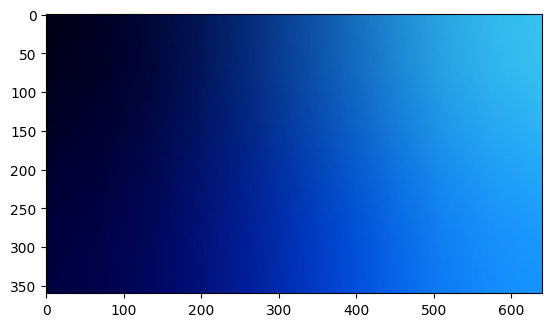

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

img = cv.imread('data/gradient.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Show image
plt.imshow(img)
plt.show()

In Computer Vision, this technique of thresholding is done on grayscale images. So initially, the image has to be converted in grayscale color space.

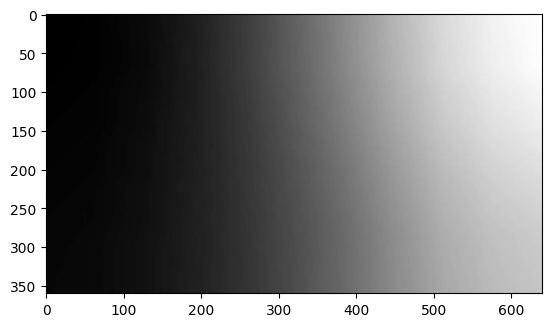

In [3]:
# Convert to grayscale
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Show image
plt.imshow(img, cmap='gray')
plt.show()

Let's apply some thresholds using the `cv.threshold` function and different thresholding techniques.

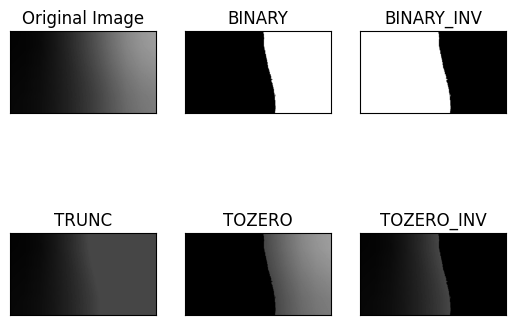

In [4]:
ret, thresh1 = cv.threshold(img, 70, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 70, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 70, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 70, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 70, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method `cv.adaptiveThreshold` takes three input parameters:

- **adaptiveMethod**: Adaptive method decides how threshold value is calculated.
    - `cv.ADAPTIVE_THRESH_MEAN_C`: Threshold Value = (Mean of the neighbourhood area values – constant value). In other words, it is the mean of the block_size×block_size neighborhood of a point minus constant.
    - `cv.ADAPTIVE_THRESH_GAUSSIAN_C`: Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value). In other words, it is a weighted sum of the block_size×block_size neighborhood of a point minus constant.
- **block_size**: Size of a pixel neighborhood that is used to calculate a threshold value.
- **constant**: A constant value that is subtracted from the mean or weighted sum of the neighbourhood pixels.

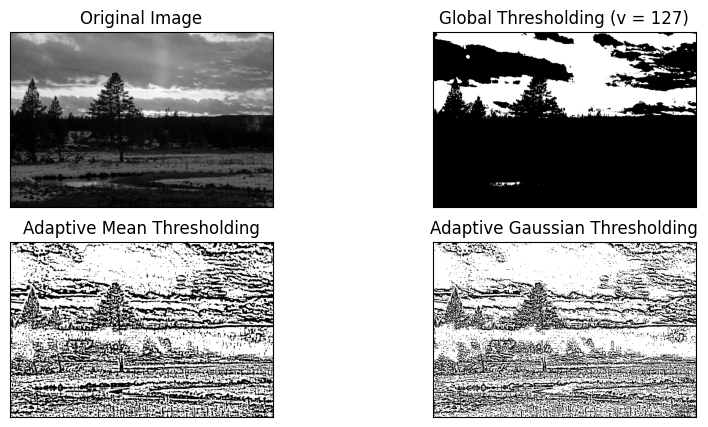

In [5]:
img = cv.imread('data/sunset.jpg', 0)

ret, th1 = cv.threshold(img, 127,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255 , cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Otsu's Binarization

In simple thresholding, we used an arbitrarily chosen value as a threshold that we had to pick. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

In Adaptive Thresholding, we use the mean of the neighborhood area as the threshold value. In Otsu's method, a single threshold is determined automatically for the entire image.

Otsu's Threshold value:  79.0


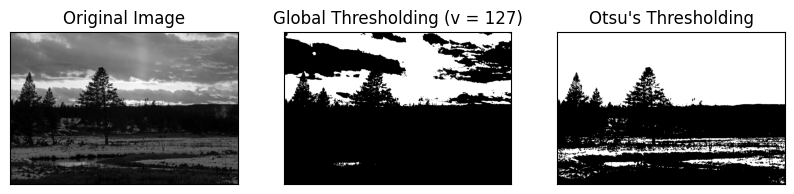

In [6]:
img = cv.imread('data/sunset.jpg', 0)

# global thresholding
ret1,th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print("Otsu's Threshold value: ", ret2)

# Show the results
plt.figure(figsize=(10,5))
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu\'s Thresholding']
images = [img, th1, th2]
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


Otsu's algorithm aims to find the threshold that minimizes the intra-class variance, which is the sum of the variances of two classes of pixels that are separated by the threshold. These two classes can be thought of as the background and the foreground of the image.

Here's a brief explanation of how the algorithm works:

1. **Histogram Computation**: The algorithm starts by computing the histogram of the grayscale image. In this histogram, the x-axis represents the intensity levels (ranging from 0 to 255 for an 8-bit image), and the y-axis represents the number of pixels at each intensity level.

2. **Cumulative Sum**: For each intensity level $i$, the algorithm computes the cumulative sum $n_1(i)$ and $n_2(i)$ of pixels up to that level and beyond that level, respectively. It also computes the cumulative mean level $m_1(i)$ and $m_2(i)$ for these two classes.

3. **Intra-Class Variance**: For each threshold $i$, the intra-class variance $ \sigma^2(i) $ is calculated. This is defined as a weighted sum of variances of these two classes:

$$
\sigma^2(i) = n_1(i) \times [m_1(i) - m_T]^2 + n_2(i) \times [m_2(i) - m_T]^2
$$

    
Here, $ m_T $ is the total mean intensity of the image.

4. **Optimal Threshold**: The algorithm finds the threshold $i$ that minimizes $ \sigma^2(i) $.

Mathematically, the optimal threshold $ T $ is found as:

$$
T = \arg \min \sigma^2(i)
$$

5. **Binary Image Creation**: Finally, this optimal threshold $ T $ is used to produce a binary image, where all pixels with intensity greater than $ T $ are set to the maximum value (often 255 for 8-bit images), and all other pixels are set to 0.

The method is particularly effective when the histogram of the grayscale values of the image has distinct peaks corresponding to the background and the object, allowing for a clear threshold to separate the two.

The algorithm is efficient and works well for bimodal or nearly bimodal histograms, but it may not be suitable for images where the object and background intensities have significant overlap or are multi-modal.